# 2. Creación de Modelos

En este notebook se desarrollará la fase de modelamiento del proyecto de Minería de Datos siguiendo la metodología CRISP-DM. El objetivo principal es construir y evaluar modelos de clasificación que permitan resolver el problema definido en la etapa de entendimiento del negocio.

Se implementarán siete modelos de machine learning, divididos en dos grandes categorías:

### Modelos de aprendizaje supervisado:

- Árbol de decisión

- Redes neuronales (MLPClassifier)

- Máquinas de vectores de soporte (SVM)

- K-vecinos más cercanos (KNN)

### Modelos de ensamble:

-  Random Forest

-  XGBoost

-  Votación suave (Soft Voting)

Cada modelo será entrenado y evaluado utilizando una validación cruzada sobre el 70% de los datos (previamente balanceados si es necesario), y se calcularán al menos cuatro métricas de calidad para cada uno. Posteriormente, los resultados obtenidos se someterán a un análisis estadístico (ANOVA y prueba de Tukey) para identificar diferencias significativas entre los modelos y seleccionar los tres con mejor desempeño.

Finalmente, los tres modelos seleccionados serán optimizados mediante técnicas como GridSearchCV y métodos de optimización avanzados (como algoritmos genéticos u optimización bayesiana), con el fin de almacenar el mejor modelo en un pipeline listo para su despliegue.

In [4]:
!pip install imblearn==0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 24.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.3
    Uninstalling scipy-1.9.3:
      Successfully uninstalled scipy-1.9.3
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [7]:
!pip install scikit-learn==1.1.3 imbalanced-learn==0.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 46.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.1.3 which is incompatible.

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

Lectura de datos preprocesados

In [11]:
#Lectura de datos
df= pd.read_csv("/work/desercion_preparado.csv")
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 74 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Application order                                        4424 non-null   int64  
 1   Daytime/evening attendance                               4424 non-null   int64  
 2   Previous qualification (grade)                           4424 non-null   float64
 3   Admission grade                                          4424 non-null   float64
 4   Displaced                                                4424 non-null   int64  
 5   Debtor                                                   4424 non-null   int64  
 6   Tuition fees up to date                                  4424 non-null   int64  
 7   Gender                                                   4424 non-null   int64  
 8   Scholarship holder          

Mediante la descripción estadística en la preparación de datos se evidenció que hay un desbalance en la variable objetivo. Sin embargo, se consulta nuevamente.

In [5]:
print(df['Target'].value_counts(normalize=True))

Target
1    0.678797
0    0.321203
Name: proportion, dtype: float64


## 2.1 Separación de datos y balanceo

In [6]:
# Separar variables
X = df.drop('Target', axis=1)
y = df['Target']

In [7]:
#  Dividir en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [8]:
#Balanceo de solo el 70%
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [9]:
#Validación Cruzada
from sklearn.model_selection import cross_validate, StratifiedKFold

#Dataframe para comparar los modelos
comparacion_CV=pd.DataFrame()
scoring=('f1', 'accuracy','precision', 'recall')
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 74 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Application order                                        4424 non-null   int64  
 1   Daytime/evening attendance                               4424 non-null   int64  
 2   Previous qualification (grade)                           4424 non-null   float64
 3   Admission grade                                          4424 non-null   float64
 4   Displaced                                                4424 non-null   int64  
 5   Debtor                                                   4424 non-null   int64  
 6   Tuition fees up to date                                  4424 non-null   int64  
 7   Gender                                                   4424 non-null   int64  
 8   Scholarship holder          

## 2.2 Creación de modelos de aprendizaje supervisado

### 2.2.1 Árbol

In [11]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

scores_tree = cross_validate(
    model_tree,
    X_train_bal, y_train_bal,  
    cv=cv,
    scoring=scoring,
    return_train_score=True,
    return_estimator=False
)
scores_tree = pd.DataFrame(scores_tree)
print("Resultados árbol de decisión:")
print(scores_tree[['test_f1', 'test_accuracy', 'test_precision', 'test_recall']].mean())

Resultados árbol de decisión:
test_f1           0.862197
test_accuracy     0.860603
test_precision    0.853136
test_recall       0.872020
dtype: float64


In [12]:
variables_numericas = [
    'Application order',
    'Daytime/evening attendance',
    'Previous qualification (grade)',
    'Admission grade',
    'Displaced',
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'Scholarship holder',
    'Age at enrollment',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

### 2.2.2 Red neuronal

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer

preprocessor_rn = ColumnTransformer([
    ('scaler', MinMaxScaler(), variables_numericas)
], remainder='passthrough')

# Pipeline con normalización selectiva para evitar data leaking
pipeline_rn = ImbPipeline([
    ('preprocessor', preprocessor_rn),
    ('classifier', MLPClassifier(
        activation="relu",
        hidden_layer_sizes=(16),
        learning_rate='constant',
        learning_rate_init=0.02,
        momentum=0.3,
        max_iter=500,
        verbose=False,
        random_state=42
    ))
])

scores_rn = cross_validate(
    pipeline_rn,
    X_train_bal, y_train_bal,
    cv=cv,
    scoring=scoring,
    return_train_score=True,
    return_estimator=False
)
scores_rn = pd.DataFrame(scores_rn)
print("Resultados Red Neuronal:")
print(scores_rn[['test_f1', 'test_accuracy', 'test_precision', 'test_recall']].mean())


Resultados Red Neuronal:
test_f1           0.883626
test_accuracy     0.880594
test_precision    0.862954
test_recall       0.905823
dtype: float64


### 2.2.3 SVM (Support Vector Machine)

In [14]:
from sklearn.svm import SVC

preprocessor_svm = ColumnTransformer([
    ('scaler', MinMaxScaler(), variables_numericas)
], remainder='passthrough')

pipeline_svm = ImbPipeline([
    ('preprocessor', preprocessor_svm),
    ('classifier', SVC(
        C=1.0,
        kernel='rbf',
        gamma='scale',
        probability=True,
        random_state=42
    ))
])

scores_svm = cross_validate(
    pipeline_svm,
    X_train_bal, y_train_bal,
    cv=cv,
    scoring=scoring,
    return_train_score=True,
    return_estimator=False
)
scores_svm = pd.DataFrame(scores_svm)
print("Resultados SVM:")
print(scores_svm[['test_f1', 'test_accuracy', 'test_precision', 'test_recall']].mean())

Resultados SVM:
test_f1           0.896480
test_accuracy     0.891062
test_precision    0.855994
test_recall       0.941494
dtype: float64


### 2.2.4 KNN 

In [15]:
from sklearn.neighbors import KNeighborsClassifier

preprocessor_knn = ColumnTransformer([
    ('scaler', MinMaxScaler(), variables_numericas)
], remainder='passthrough')

pipeline_knn = ImbPipeline([
    ('preprocessor', preprocessor_knn),
    ('classifier', KNeighborsClassifier(n_neighbors=1, metric='euclidean'))
])

scores_knn = cross_validate(
    pipeline_knn,
    X_train_bal, y_train_bal,
    cv=cv,
    scoring=scoring,
    return_train_score=True,
    return_estimator=False
)
scores_knn = pd.DataFrame(scores_knn)
print("Resultados KNN:")
print(scores_knn[['test_f1', 'test_accuracy', 'test_precision', 'test_recall']].mean())

Resultados KNN:
test_f1           0.802962
test_accuracy     0.796636
test_precision    0.779510
test_recall       0.828763
dtype: float64


## 2.3 Creación de modelos de ensamble

### 2.3.1 Random forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

scores_rf = cross_validate(
    model_rf, 
    X_train_bal, y_train_bal, 
    cv=cv, 
    scoring=scoring, 
    return_train_score=True, 
    return_estimator=False
)
scores_rf = pd.DataFrame(scores_rf)
print("Resultados Random Forest:")
print(scores_rf[['test_f1', 'test_accuracy', 'test_precision', 'test_recall']].mean())

Resultados Random Forest:
test_f1           0.888218
test_accuracy     0.885588
test_precision    0.869298
test_recall       0.908675
dtype: float64


### 2.3.2 XGBoost

In [4]:
!pip install xgboost==3.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 1.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [18]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(
    max_depth=10,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

scores_xgboost = cross_validate(
    model_xgb,
    X_train_bal, y_train_bal,
    cv=cv,
    scoring=scoring,
    return_train_score=True,
    return_estimator=False
)
scores_xgboost = pd.DataFrame(scores_xgboost)
print("Resultados XGBoost:")
print(scores_xgboost[['test_f1', 'test_accuracy', 'test_precision', 'test_recall']].mean())

/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [03:33:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [03:33:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [03:33:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [03:33:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [03:33:53] WARNING: /w

### 2.3.3 Soft Voting

In [19]:
from sklearn.ensemble import VotingClassifier

preprocessor_voting = ColumnTransformer([
    ('scaler', MinMaxScaler(), variables_numericas)
], remainder='passthrough')

# Para Soft Voting, reutilizamos modelos ya definidos 
estimators = [
    ('tree', model_tree),  # Uso del árbol ya definido
    ('rf', model_rf),      # Uso del random forest ya definido
    ('svm', Pipeline([
        ('preprocessor', preprocessor_voting),
        ('classifier', SVC(
            C=1.0, kernel='rbf', gamma='scale', 
            probability=True, random_state=42
        ))
    ])),
    ('mlp', Pipeline([
        ('preprocessor', ColumnTransformer([
            ('scaler', MinMaxScaler(), variables_numericas)
        ], remainder='passthrough')),
        ('classifier', MLPClassifier(
            activation="relu", hidden_layer_sizes=(16),
            learning_rate='constant', learning_rate_init=0.02,
            momentum=0.3, max_iter=500, verbose=False,
            random_state=42
        ))
    ])),
    ('xgb', model_xgb)  # Uso de XGBoost ya definido
]

model_voting = VotingClassifier(
    estimators=estimators,
    voting='soft',  # Usa probabilidades
    n_jobs=-1
)

scores_voting = cross_validate(
    model_voting,
    X_train_bal, y_train_bal,
    cv=cv,
    scoring=scoring,
    return_train_score=True,
    return_estimator=False
)
scores_voting = pd.DataFrame(scores_voting)
print("Resultados Soft Voting:")
print(scores_voting[['test_f1', 'test_accuracy', 'test_precision', 'test_recall']].mean())

/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [03:33:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [03:34:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [03:34:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [03:34:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [03:34:08] WARNING: /w

## 2.3 Comparación de métricas de modelos

In [20]:
!pip install statsmodels==0.14.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 91.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 52.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [21]:
def calcular_promedios(scores, nombre_modelo):
    return {
        'Modelo': nombre_modelo,
        'F1': scores['test_f1'].mean(),
        'Accuracy': scores['test_accuracy'].mean(),
        'Precision': scores['test_precision'].mean(),
        'Recall': scores['test_recall'].mean()
    }

resultados = pd.DataFrame([
    calcular_promedios(scores_tree, "Árbol de decisión"),
    calcular_promedios(scores_rn, "Red Neuronal"),
    calcular_promedios(scores_svm, "SVM"),
    calcular_promedios(scores_knn, "KNN"),
    calcular_promedios(scores_rf, "Random Forest"),
    calcular_promedios(scores_xgboost, "XGBoost"),
    calcular_promedios(scores_voting, "Soft Voting")
])

resultados = resultados.sort_values('F1', ascending=False)
print(resultados.to_markdown(index=False))

| Modelo            |       F1 |   Accuracy |   Precision |   Recall |
|:------------------|---------:|-----------:|------------:|---------:|
| Soft Voting       | 0.911379 |   0.909134 |    0.891595 | 0.932938 |
| XGBoost           | 0.909901 |   0.907941 |    0.893629 | 0.927689 |
| SVM               | 0.89648  |   0.891062 |    0.855994 | 0.941494 |
| Random Forest     | 0.888218 |   0.885588 |    0.869298 | 0.908675 |
| Red Neuronal      | 0.883626 |   0.880594 |    0.862954 | 0.905823 |
| Árbol de decisión | 0.862197 |   0.860603 |    0.853136 | 0.87202  |
| KNN               | 0.802962 |   0.796636 |    0.77951  | 0.828763 |


## 2.4 Anova

In [22]:
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Crear un DataFrame con los resultados de F1-score de los modelos
resultados_f1 = pd.DataFrame({
    'Árbol de decisión': scores_tree['test_f1'],
    'Red Neuronal': scores_rn['test_f1'],
    'SVM': scores_svm['test_f1'],
    'KNN': scores_knn['test_f1'],
    'Random Forest': scores_rf['test_f1'],
    'XGBoost': scores_xgboost['test_f1'],
    'Soft Voting': scores_voting['test_f1']
})

# Reorganizar los datos para ANOVA
resultados_melt = resultados_f1.melt(var_name='Modelo', value_name='F1')

Resultados ANOVA:
F-statistic: 72.1431
p-value: 0.0000

Hay diferencias significativas entre al menos un par de modelos (p < 0.05).
Procedemos con la prueba de Tukey para identificar qué modelos difieren.

Resultados de la prueba de Tukey:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1          group2      meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
          KNN     Random Forest   0.0853    0.0  0.0662  0.1043   True
          KNN      Red Neuronal   0.0807    0.0  0.0616  0.0997   True
          KNN               SVM   0.0935    0.0  0.0745  0.1126   True
          KNN       Soft Voting   0.1084    0.0  0.0894  0.1275   True
          KNN           XGBoost   0.1069    0.0  0.0879   0.126   True
          KNN Árbol de decisión   0.0592    0.0  0.0402  0.0783   True
Random Forest      Red Neuronal  -0.0046 0.9899 -0.0237  0.0145  False
Random Forest               SVM   0.0083 0.8401 -0

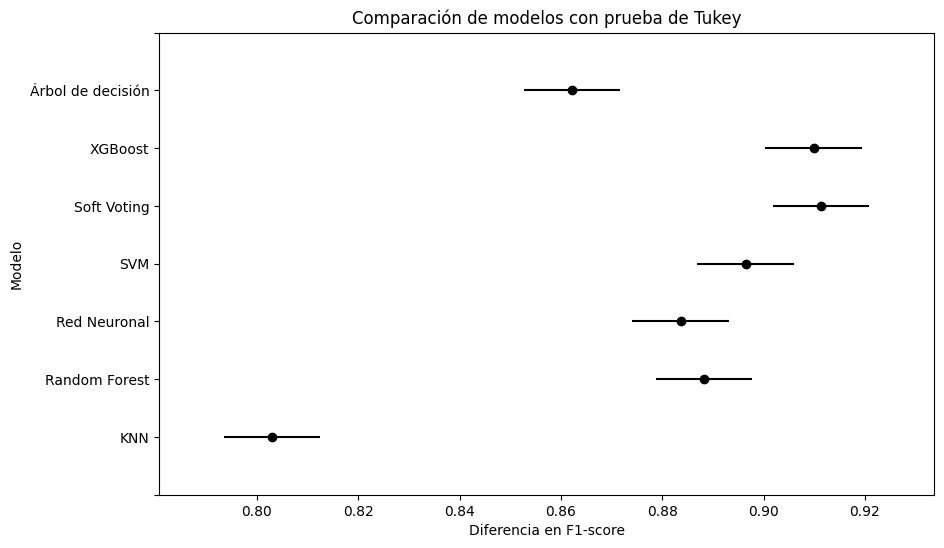

In [23]:
# Realizar ANOVA
anova_result = stats.f_oneway(
    resultados_f1['Árbol de decisión'],
    resultados_f1['Red Neuronal'],
    resultados_f1['SVM'],
    resultados_f1['KNN'],
    resultados_f1['Random Forest'],
    resultados_f1['XGBoost'],
    resultados_f1['Soft Voting']
)

print("Resultados ANOVA:")
print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"p-value: {anova_result.pvalue:.4f}")

# Interpretación
if anova_result.pvalue < 0.05:
    print("\nHay diferencias significativas entre al menos un par de modelos (p < 0.05).")
    print("Procedemos con la prueba de Tukey para identificar qué modelos difieren.")
    
    # Realizar prueba de Tukey
    tukey = pairwise_tukeyhsd(
        endog=resultados_melt['F1'],
        groups=resultados_melt['Modelo'],
        alpha=0.05
    )
    
    print("\nResultados de la prueba de Tukey:")
    print(tukey.summary())
    
    # Visualización gráfica
    tukey.plot_simultaneous()
    plt.ylabel('Modelo')
    plt.xlabel('Diferencia en F1-score')
    plt.title('Comparación de modelos con prueba de Tukey')
    plt.show()
else:
    print("\nNo hay diferencias significativas entre los modelos (p ≥ 0.05).")

TOP 3 RECOMENDADO (equilibrando performance y costo):
🥇 1. XGBoost

F1-score: ~0.91 (el más alto)
Costo: Alto, pero justificado por su excelente performance
Ventajas: Mejor modelo individual, robusto, maneja bien overfitting

🥈 2. Random Forest

F1-score: ~0.89 (muy bueno)
Costo: Medio (paralelizable, eficiente)
Ventajas: Excelente relación performance/costo, interpretable, estable

🥉 3. SVM

F1-score: ~0.89 (muy bueno)
Costo: Medio
Ventajas: Sólido desempeño, buena generalización

# 3. Hiperparametrización

### Optimización GridSearch

In [36]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 21.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [39]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import joblib
import warnings
warnings.filterwarnings('ignore')

# Cargar datos
df = pd.read_csv("/work/desercion_preparado.csv")
X = df.drop('Target', axis=1)
y = df['Target']

# Dividir datos (ya balanceados previamente)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Definir variables numéricas
variables_numericas = [
    'Application order', 'Daytime/evening attendance', 'Previous qualification (grade)',
    'Admission grade', 'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender',
    'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
    'Inflation rate', 'GDP'
]

# Transformador 
preprocessor = ColumnTransformer([
    ('scaler', MinMaxScaler(), variables_numericas)
], remainder='passthrough')

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scoring = 'f1'

In [42]:
# Pipeline para XGBoost
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Parámetros para GridSearch
param_grid_xgb = {
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0]
}

# GridSearch para XGBoost
grid_xgb = GridSearchCV(
    estimator=pipeline_xgb,
    param_grid=param_grid_xgb,
    cv=cv,
    scoring=scoring,
    n_jobs=-1,
    verbose=1
)

grid_xgb.fit(X_train, y_train)

print("Mejores parámetros XGBoost:", grid_xgb.best_params_)
print("Mejor F1-score XGBoost:", grid_xgb.best_score_)

  bst.update(dtrain, iteration=i, fobj=obj)
/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [03:54:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [03:54:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [03:54:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [03:54:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/root/venv/lib/python3.10/site-packages/xgboost/training

In [45]:
# Pipeline para Random Forest
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Parámetros para GridSearch
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2', None]
}

# GridSearch para Random Forest
grid_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    cv=cv,
    scoring=scoring,
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, y_train)

print("Mejores parámetros Random Forest:", grid_rf.best_params_)
print("Mejor F1-score Random Forest:", grid_rf.best_score_)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits
Mejores parámetros Random Forest: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Mejor F1-score Random Forest: 0.9143690776535427


In [48]:
# Pipeline para SVM
pipeline_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])

# Parámetros para GridSearch
param_grid_svm = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto', 0.1, 1]
}

# GridSearch para SVM
grid_svm = GridSearchCV(
    estimator=pipeline_svm,
    param_grid=param_grid_svm,
    cv=cv,
    scoring=scoring,
    n_jobs=-1,
    verbose=1
)

grid_svm.fit(X_train, y_train)

print("Mejores parámetros SVM:", grid_svm.best_params_)
print("Mejor F1-score SVM:", grid_svm.best_score_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Mejores parámetros SVM: {'classifier__C': 100, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
Mejor F1-score SVM: 0.9098320522181431


## Optimización bayesiana

### XGBoost con BayesSearchCV

In [51]:
# Espacio de búsqueda para optimización bayesiana
search_space_xgb = {
    'classifier__max_depth': Integer(3, 10),
    'classifier__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'classifier__n_estimators': Integer(50, 300),
    'classifier__subsample': Real(0.5, 1.0),
    'classifier__colsample_bytree': Real(0.5, 1.0),
    'classifier__gamma': Real(0, 5),
    'classifier__reg_alpha': Real(0, 10),
    'classifier__reg_lambda': Real(0, 10)
}

# Optimización bayesiana para XGBoost
bayes_xgb = BayesSearchCV(
    estimator=pipeline_xgb,
    search_spaces=search_space_xgb,
    cv=cv,
    scoring=scoring,
    n_jobs=-1,
    n_iter=50,
    verbose=1,
    random_state=42
)

bayes_xgb.fit(X_train, y_train)

print("Mejores parámetros XGBoost (Bayes):", bayes_xgb.best_params_)
print("Mejor F1-score XGBoost (Bayes):", bayes_xgb.best_score_)

  bst.update(dtrain, iteration=i, fobj=obj)
/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [04:28:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [04:28:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [04:28:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
Fitting 10 folds for each of 1 candidates, totalling 10 fits
/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [04:28:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=

### Random Forest con BayesSearchCV

In [54]:
search_space_rf = {
    'classifier__n_estimators': Integer(50, 300),
    'classifier__max_depth': Integer(3, 20),
    'classifier__min_samples_split': Integer(2, 20),
    'classifier__min_samples_leaf': Integer(1, 10),
    'classifier__max_features': Categorical(['sqrt', 'log2', None]),
    'classifier__bootstrap': Categorical([True, False])
}

bayes_rf = BayesSearchCV(
    estimator=pipeline_rf,
    search_spaces=search_space_rf,
    cv=cv,
    scoring=scoring,
    n_jobs=-1,
    n_iter=50,
    verbose=1,
    random_state=42
)

bayes_rf.fit(X_train, y_train)

print("Mejores parámetros Random Forest (Bayes):", bayes_rf.best_params_)
print("Mejor F1-score Random Forest (Bayes):", bayes_rf.best_score_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

### SVM con BayesSearchCV

In [57]:
search_space_svm = {
    'classifier__C': Real(1e-3, 1e3, prior='log-uniform'),
    'classifier__kernel': Categorical(['linear', 'rbf', 'poly']),
    'classifier__gamma': Real(1e-3, 1e3, prior='log-uniform'),
    'classifier__degree': Integer(2, 5)  # Solo para kernel poly
}

bayes_svm = BayesSearchCV(
    estimator=pipeline_svm,
    search_spaces=search_space_svm,
    cv=cv,
    scoring=scoring,
    n_jobs=-1,
    n_iter=50,
    verbose=1,
    random_state=42
)

bayes_svm.fit(X_train, y_train)

print("Mejores parámetros SVM (Bayes):", bayes_svm.best_params_)
print("Mejor F1-score SVM (Bayes):", bayes_svm.best_score_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

## Evaluación y selección del mejor modelo

In [58]:
# Recolectar resultados
results = {
    'XGBoost_Grid': grid_xgb.best_score_,
    'XGBoost_Bayes': bayes_xgb.best_score_,
    'RF_Grid': grid_rf.best_score_,
    'RF_Bayes': bayes_rf.best_score_,
    'SVM_Grid': grid_svm.best_score_,
    'SVM_Bayes': bayes_svm.best_score_
}

# Identificar el mejor modelo
best_model_name = max(results, key=results.get)
best_score = results[best_model_name]

print(f"\nEl mejor modelo es: {best_model_name} con un F1-score de: {best_score:.4f}")

# Asignar el mejor modelo
if 'XGBoost' in best_model_name:
    best_model = bayes_xgb if 'Bayes' in best_model_name else grid_xgb
elif 'RF' in best_model_name:
    best_model = bayes_rf if 'Bayes' in best_model_name else grid_rf
else:
    best_model = bayes_svm if 'Bayes' in best_model_name else grid_svm


El mejor modelo es: XGBoost_Grid con un F1-score de: 0.9158


## Almacenamiento del mejor modelo para despliegue

In [59]:
# Guardar el mejor modelo
joblib.dump(best_model.best_estimator_, 'mejor_modelo_desercion.pkl')

# Guardar también el preprocesador por separado
joblib.dump(preprocessor, 'preprocessor_desercion.pkl')

print("Mejor modelo guardado correctamente para despliegue.")

Mejor modelo guardado correctamente para despliegue.


In [16]:
import xgboost

variables_int = [
    'Application order',
    'Daytime/evening attendance',
    'Displaced',
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'Scholarship holder',
    'Age at enrollment',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (without evaluations)'
]

variables_float = [
    'Previous qualification (grade)',
    'Admission grade',
    'Curricular units 2nd sem (grade)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

variables_bool = [
    'Marital status_Divorced',
    'Marital status_FactoUnion',
    'Marital status_Separated',
    'Marital status_Single',
    'Application mode_Admisión Especial',
    'Application mode_Admisión Regular',
    'Application mode_Admisión por Ordenanza',
    'Application mode_Cambios/Transferencias',
    'Application mode_Estudiantes Internacionales',
    'Application mode_Mayores de 23 años',
    'Course_Agricultural & Environmental Sciences',
    'Course_Arts & Design',
    'Course_Business & Management',
    'Course_Communication & Media',
    'Course_Education',
    'Course_Engineering & Technology',
    'Course_Health Sciences',
    'Course_Social Sciences',
    'Previous qualification_Higher Education',
    'Previous qualification_Other',
    'Previous qualification_Secondary Education',
    'Previous qualification_Technical Education',
    'Nacionality_Colombian',
    'Nacionality_Cuban',
    'Nacionality_Dutch',
    'Nacionality_English',
    'Nacionality_German',
    'Nacionality_Italian',
    'Nacionality_Lithuanian',
    'Nacionality_Moldovan',
    'Nacionality_Mozambican',
    'Nacionality_Portuguese',
    'Nacionality_Romanian',
    'Nacionality_Santomean',
    'Nacionality_Turkish',
    "Mother's qualification_Basic_or_Secondary",
    "Mother's qualification_Other_or_Unknown",
    "Mother's qualification_Postgraduate",
    "Mother's qualification_Technical_Education",
    "Father's qualification_Basic_or_Secondary",
    "Father's qualification_Other_or_Unknown",
    "Father's qualification_Postgraduate",
    "Mother's occupation_Administrative/Clerical",
    "Mother's occupation_Skilled Manual Workers",
    "Mother's occupation_Special Cases",
    "Mother's occupation_Technicians/Associate Professionals",
    "Mother's occupation_Unskilled Workers",
    "Father's occupation_Administrative/Clerical",
    "Father's occupation_Professionals",
    "Father's occupation_Skilled Manual Workers",
    "Father's occupation_Special Cases",
    "Father's occupation_Technicians/Associate Professionals"
]

# Variables que necesitan escalado (numéricas continuas)
variables_a_escalar = variables_float + [
    'Application order',
    'Age at enrollment',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (without evaluations)'
]

# Crear el transformador para escalar solo las variables seleccionadas
preprocessor = ColumnTransformer([
    ('scaler', MinMaxScaler(), variables_a_escalar)
], remainder='passthrough')  

# Configurar el modelo XGBoost con los mejores parámetros encontrados
best_xgb_params = {
    'colsample_bytree': 1.0,
    'gamma': 0.0,
    'learning_rate': 0.08905618676080333,
    'max_depth': 10,
    'n_estimators': 64,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'subsample': 0.5,
    'use_label_encoder': False,
    'eval_metric': 'logloss',
    'random_state': 42
}

# Crear el pipeline completo
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(**best_xgb_params))
])

df = pd.read_csv("desercion_preparado.csv")
X = df.drop('Target', axis=1)
y = df['Target']

final_pipeline.fit(X, y)

# Guardar el pipeline completo para despliegue
joblib.dump(final_pipeline, 'pipeline_final_desercion.pkl')

# Opcional: Guardar también la lista de columnas esperadas
joblib.dump(X.columns.tolist(), 'columnas_esperadas.pkl')

/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:24:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


['columnas_esperadas.pkl']

In [14]:
# Verificar una predicción del pipeline
print("Predicción de prueba:", final_pipeline.predict(X[:1]))

Predicción de prueba: [0]


In [17]:
final_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['Previous qualification '
                                                   '(grade)',
                                                   'Admission grade',
                                                   'Curricular units 2nd sem '
                                                   '(grade)',
                                                   'Unemployment rate',
                                                   'Inflation rate', 'GDP',
                                                   'Application order',
                                                   'Age at enrollment',
                                                   'Curricular units 1st sem '
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(without eval...
                               gamma=0.0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.08905618676080333, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=10,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=64,
                               n_jobs=None, num_parallel_tree=None, ...))])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ef7c6378-2156-4a8c-80f7-71946664b1f4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>